In [3]:
import pandas as pd
import numpy as np
import analyzer as an
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv("problems.csv", delimiter=";")

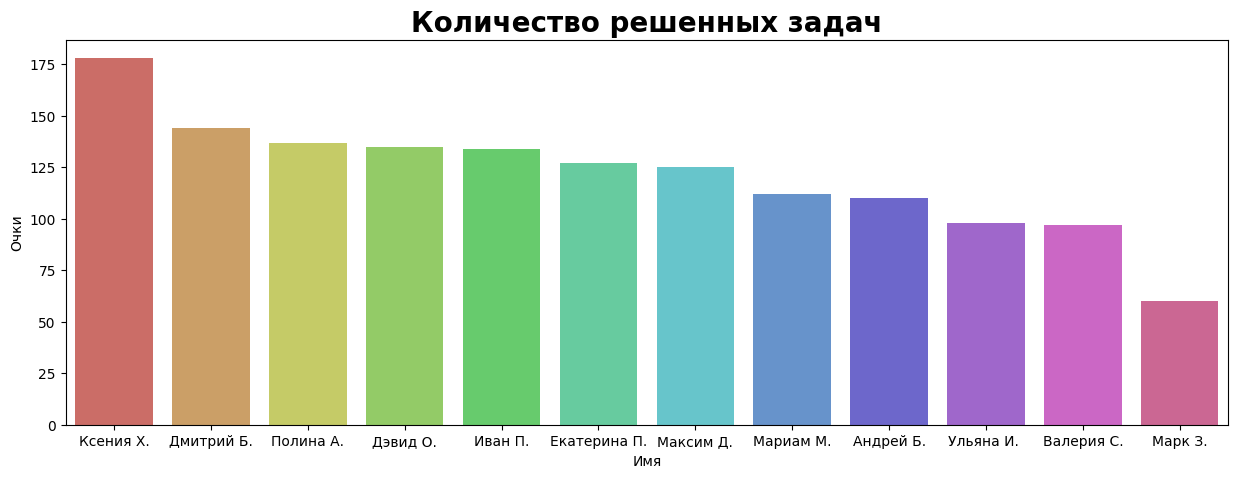

In [50]:
total_problems = an.total_problems(df).sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Количество решенных задач", weight="heavy", size=20)
sns.barplot(total_problems, x="Имя", y="Очки", palette="hls", hue="Имя")
plt.show()

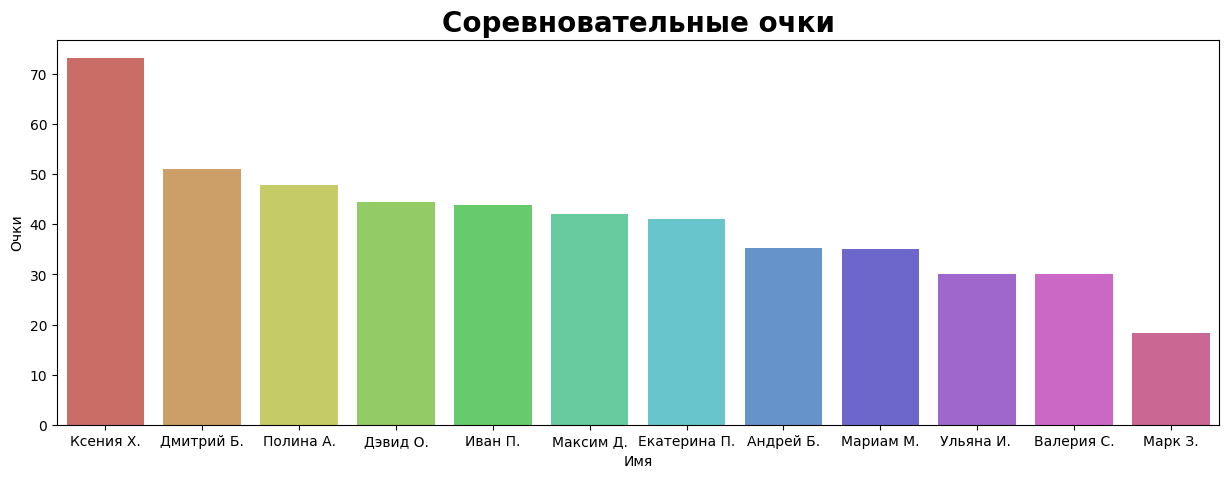

In [47]:
comp_points = an.competative_points(df, weight_func="sqrt").sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Соревновательные очки", weight="heavy", size=20)
sns.barplot(comp_points, x="Имя", y="Очки", palette='hls', hue="Имя")
plt.show()

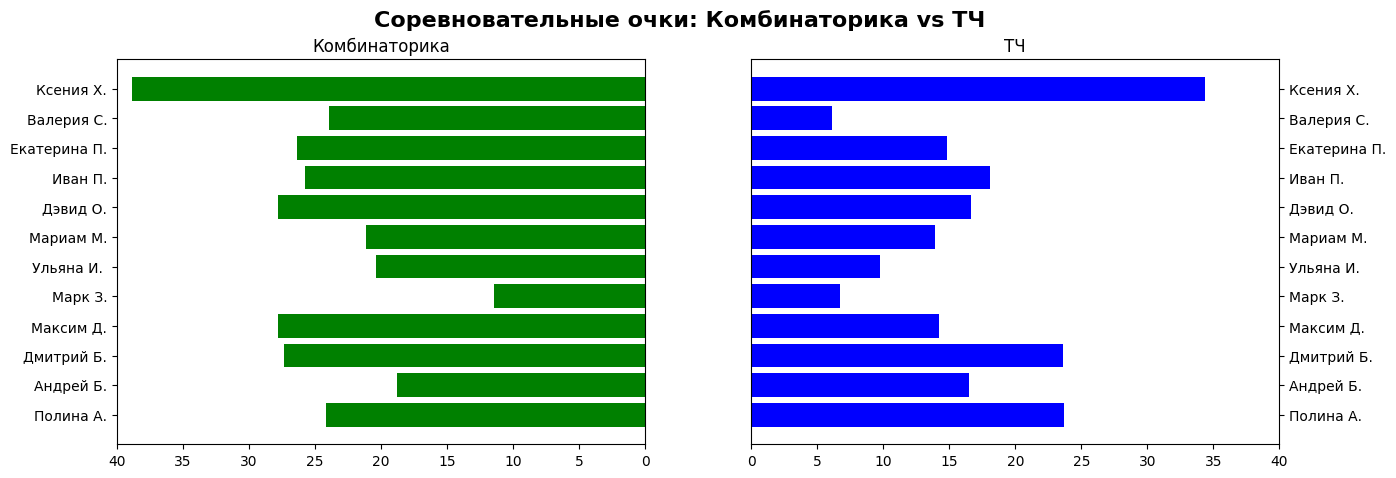

In [51]:
points_c = an.competative_points(df, topic='Комбинаторика', weight_func="sqrt")
points_t = an.competative_points(df, topic='ТЧ', weight_func="sqrt")

plt.figure(figsize=(15, 5))
plt.suptitle("Соревновательные очки: Комбинаторика vs ТЧ", size=16, weight='heavy')

plt.subplot(1, 2, 1)
plt.title("Комбинаторика")
plt.barh(points_t.index.tolist(), points_c, color='g')
plt.gca().set_xlim([40, 0])


plt.subplot(1, 2, 2)
plt.title("ТЧ")
plt.barh(points_t.index.tolist(), points_t, color='b')
plt.tick_params(axis='y', labelleft=False, labelright=True, left = False, right=True)
plt.gca().set_xlim([0, 40])



plt.show()

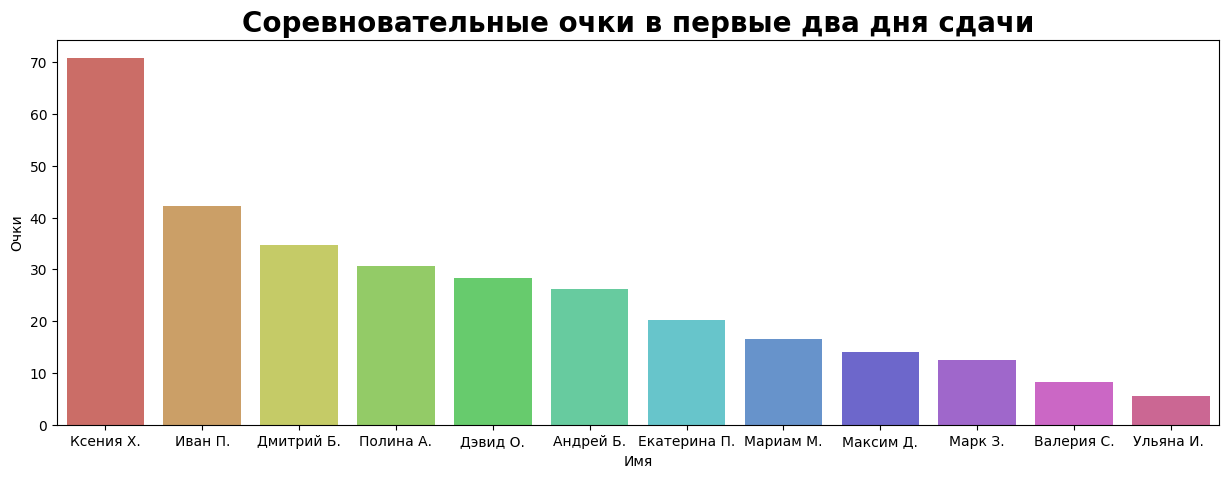

In [55]:
start_comp_points = an.competative_points(df, weight_func="sqrt", days=[1,2]).sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Соревновательные очки в первые два дня сдачи", weight="heavy", size=20)
sns.barplot(start_comp_points, x="Имя", y="Очки", palette='hls', hue="Имя")
plt.show()